## Question 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('task2.txt')
df.head(10)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,16,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
5,17,Paavo Johannes Aaltonen,M,32,175,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
6,30,Pepijn Aardewijn,M,26,189,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
7,37,Ann Kristin Aarnes,F,23,182,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
8,62,Giovanni Abagnale,M,21,198,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
9,63,Jos Luis Abajo Gmez,M,30,194,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze


In [5]:
df.shape

(23850, 15)

In [6]:
cond=((df['sex']=='F') & (df['sport']=="Athletics")) 

df1=df[cond]
df1.shape

(1239, 15)

In [7]:
df1.head(10)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22,179,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
50,428,Elvan Abeylegesse,F,25,159,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver
103,846,Valerie Kasanita Adams-Vili (-Price),F,23,193,120.0,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold
104,846,Valerie Kasanita Adams-Vili (-Price),F,27,193,120.0,New Zealand,NZL,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Shot Put,Gold
105,846,Valerie Kasanita Adams-Vili (-Price),F,31,193,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
140,1088,"Olabisi ""Bisi"" Afolabi",F,20,180,62.0,Nigeria,NGR,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
189,1447,Marlene Ahrens Ostertag (-Ebensperger),F,23,176,70.0,Chile,CHI,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Javelin Throw,Silver
216,1564,Chioma Ajunwa (-Opara),F,24,164,57.0,Nigeria,NGR,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's Long Jump,Gold
237,1682,Morolake Akinosun,F,22,163,61.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold
243,1732,Liudmyla Vasylivna Aksenova (Shapovalova-),F,29,165,58.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


Compute the 95th percentile of heights for the competitors in all Athletic events for gender Female. Note that sport refers to the broad sports (Athletics) and event is the specific event (100-meter sprint).

In [8]:
df2 = df1['height'].quantile(0.95)
df2

183.0

In [9]:
cond1=(df['sex']=='F')
df3 = df[cond1]
df4 = df3.groupby(['event'])['height'].std().sort_index()
# df3 = df1.groupby(['event'])['height'].agg(np.std)
# df3
df4

event
Athletics Women's 1,500 metres                    5.032908
Athletics Women's 10 kilometres Walk              4.308906
Athletics Women's 10,000 metres                   5.409697
Athletics Women's 100 metres                      6.289850
Athletics Women's 100 metres Hurdles              4.677272
                                                    ...   
Wrestling Women's Flyweight, Freestyle            2.924445
Wrestling Women's Heavyweight, Freestyle          4.250490
Wrestling Women's Light-Heavyweight, Freestyle    6.658328
Wrestling Women's Lightweight, Freestyle          3.976119
Wrestling Women's Middleweight, Freestyle         4.043808
Name: height, Length: 132, dtype: float64

Find the single woman’s event that depicts the highest variability in the height of the competitor across the entire history of Olympics. Use the standard deviation as the yardstick for this.

In [10]:
df4.max()

10.865490498296019

Text(0, 0.5, 'Standard Deviation')

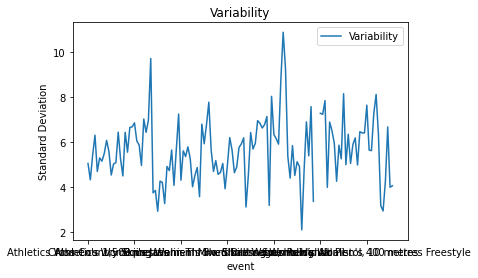

In [11]:
df3.groupby(['event']).std()['height'].plot(label = "Variability")
plt.legend()
plt.title("Variability")
plt.ylabel("Standard Deviation")

In [34]:
# df1.groupby(['event'])['height'].std().sort_values(by = 'height', ascending = False)
df3.groupby(['event']).agg({'height':np.std}).sort_values(by = 'height', ascending = False). head(10)

,height
event,
Rowing Women's Coxed Fours,10.865490
Basketball Women's Basketball,9.700255
Rowing Women's Coxed Quadruple Sculls,9.246396
Rowing Women's Coxed Eights,8.741931
Swimming Women's 100 metres Butterfly,8.134399
Volleyball Women's Volleyball,8.101521
Gymnastics Women's Uneven Bars,8.015942
Shooting Women's Double Trap,7.826238
Cycling Women's Keirin,7.756718


Here I find that the highest variability is observed in the event Rowing Women's Coxed Fours.

In [13]:
newdf = df.loc[df.sport == 'Swimming']
newdf

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
34,259,Reema Abdo,F,21,173,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
58,460,Viktor Andreyevich Aboimov,M,22,190,78.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver
59,460,Viktor Andreyevich Aboimov,M,22,190,78.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
60,465,"Matthew ""Matt"" Abood",M,30,197,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
65,509,Gary Abraham,M,21,175,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23799,135302,Iris Zscherpe,F,17,174,55.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
23821,135396,Martijn Hendrik Zuijdweg,M,23,186,83.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
23828,135415,Robertas ulpa,M,20,193,82.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Breaststroke,Gold
23831,135489,Anastasiya Valeryevna Zuyeva-Fesikova,F,22,182,71.0,Russia,RUS,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,Silver


In [14]:
# data_f = df[(df['sex']=='F')]
# data_f = data_f.groupby(['year'])['age'].mean()

In [15]:
# data_f

In [16]:
# data_m = df[(df['sex']=='M')]
# data_m = data_m.groupby(['year'])['age'].mean()

In [17]:
# data_m

In [18]:
# data_f.plot()

In [19]:
# data_m.plot()

In [20]:
# ax = data_f.plot(x='year', y='age')
# data_m.plot(ax=ax, x='year', y='age')

In [21]:
d = newdf.groupby(['year', 'sex'])['age'].mean().unstack()
d

sex,F,M
year,,
1900,NaN,18.000000
1904,NaN,20.142857
1906,NaN,22.000000
1908,NaN,23.454545
1912,NaN,27.000000
1920,NaN,26.000000
1924,18.000000,32.000000
1928,NaN,23.500000
1932,NaN,19.000000


<AxesSubplot:title={'center':'Average Age Evoled With Year for Male and Female'}, xlabel='year', ylabel='Age'>

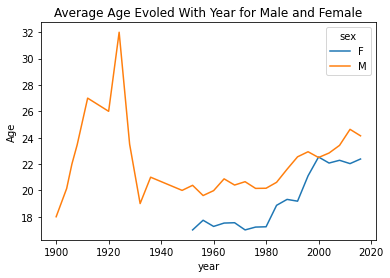

In [22]:
d.plot(ylabel = 'Age', title = 'Average Age Evoled With Year for Male and Female')
